# Morphological Operations

In the last lesson we learned about how we can detect edges using the good old convolution operation and how edge detection can help us solve some basic image analytics problems.

However, in the medicine tablet example we saw that edge detection can lead to an amplification of noise in images. As noise is generally inevitable in image data, edge detection more often than not is plagued by the problem of false positives.

An analyst has to code different kinds of work arounds to tackle these noisy artifacts popping up after the application of edge detection kernels on an image. **In such cases, a technique which can help us tune our results would be much appreciated**.

Morphological operation is one such technique, to fine tune an image to dilute or emphasize certain kind of patterns in an image.

This technique uses a slightly different variant of convolution operation in the way the final output is calculated. Let's check out two main kinds of morphological operation for binary images, namely **Erosion** and **Dilation**.

The result of a morphological operation is calculated by a logical operation for each kernel position. This logical operation is based on a logical condition (AND, OR, etc).

**Erosion**

- Erosion operation is defined by a kind of AND logic. If all the active kernel indices overlap with the corresponding intensity indicies in the image then the output is 1 (or 255) else 0. 

- This operation results in reducing the objects or eroding the objects in an image. It is used to trim objects and refine the selections.

**Dilation**

- Dilation operation is defined by a kind of OR logic. If any of the active kernel indices overlap with the corresponding intensity indicies in the image then the output is 1 (or 255) else 0.

- This operation results in an inflation or expansion in the object size/shape. It is used to fill holes or artifacts in objects or increase the search area.

The below figures show an example of Erosion and Dilation operations.

<br/>

<figure>
    <img src="../assets/drawings/morphological1.jpg" width = 600px/>
    <figcaption style = "text-align:center">A sample binary image and a 3X3 Kernel</figcaption>
</figure>

<br/>

<br/>

<figure>
    <img src="../assets/drawings/morphological2.jpg" width = 600px/>
    <figcaption style = "text-align:center">Morphological Operation results. A) Erosion B) Dilation</figcaption>
</figure>

<br/>

**OpenCV Link**: https://docs.opencv.org/trunk/d9/d61/tutorial_py_morphological_ops.html

In [1]:
# Importing libraries

import cv2
import sys
import requests
import numpy as np
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
sys.path.append('../')
from utils import image_utils as utils

## Tablet Problem Example

In [2]:
# Reading an image of a medical tablet pack

response = requests.get('https://i.stack.imgur.com/ukOkD.jpg')
img = np.asarray(Image.open(BytesIO(response.content)))
img_bw = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

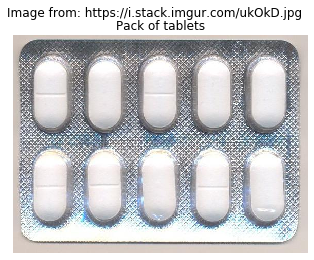

In [3]:
utils.showImage([img], ['Pack of tablets'], 'Image from: https://i.stack.imgur.com/ukOkD.jpg')

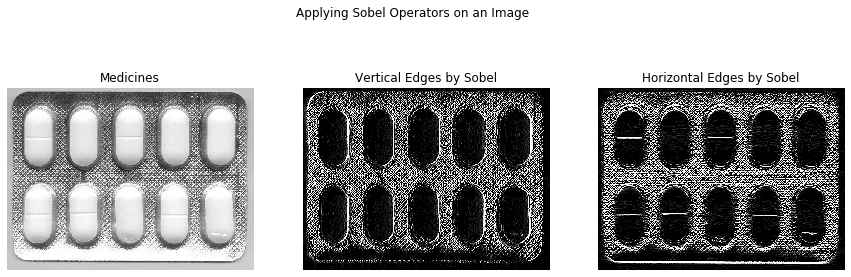

In [4]:
# Sobel Operator

# img_bw = cv2.GaussianBlur(img_bw, (3, 3), 3)
sobelx = np.array([[1, 0, -1], [10, 0, -10],[1, 0, -1]])
sobely = np.array([[-1, -10, -1], [0, 0, 0],[1, 10, 1]])

vertical_edge = cv2.filter2D(img_bw, -1, sobelx)
horizontal_edge = cv2.filter2D(img_bw, -1, sobely)

utils.showImage([img_bw, vertical_edge, horizontal_edge], ['Medicines', 'Vertical Edges by Sobel', 'Horizontal Edges by Sobel'],
                'Applying Sobel Operators on an Image')

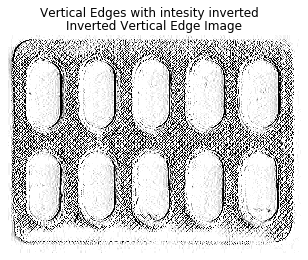

In [5]:
vertical_inv = cv2.bitwise_not(vertical_edge)
utils.showImage([vertical_inv], ['Inverted Vertical Edge Image'], 'Vertical Edges with intesity inverted')

Now let's see what morphological operation can do for us. We want to retain the tablets but want to remove all that noise coming from the high frequency changes in the intensity level of the packet.

Let's use erosion operation with a kernel similar in shape to the tablets and see what we get.

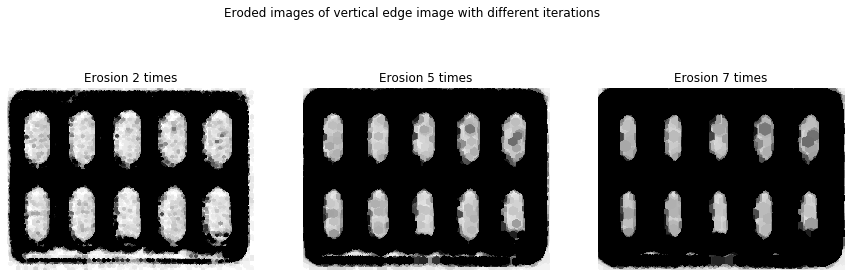

In [13]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))

erosion2 = cv2.erode(vertical_inv, kernel, iterations = 2)
erosion5 = cv2.erode(vertical_inv, kernel, iterations = 5)
erosion7 = cv2.erode(vertical_inv, kernel, iterations = 7)

utils.showImage([erosion2, erosion5, erosion7], ['Erosion 2 times', 'Erosion 5 times', 'Erosion 7 times'], 
                'Eroded images of vertical edge image with different iterations')

### Observations

- As we increase the number of iterations of erosion, the artifacts are reduced, but so are the required elements.

- We have to strike a balance between too much erosion and too little to retain what we like and remove what we do not want.

### Workaround

- We know we can increase the desired patterns by Dilation. So why not erode just little more than enough and the dilate.

Let's check this out.

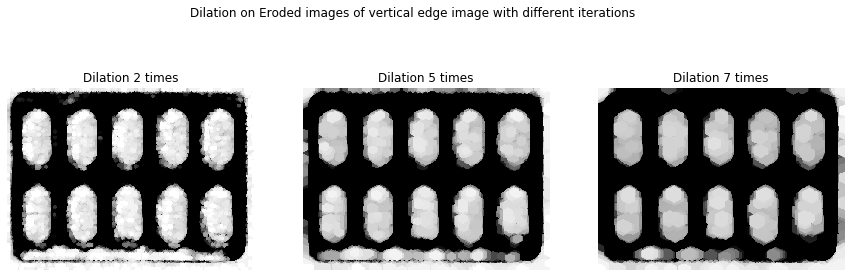

In [14]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))

dilate2 = cv2.dilate(erosion2, kernel, iterations = 2)
dilate5 = cv2.dilate(erosion5, kernel, iterations = 5)
dilate7 = cv2.dilate(erosion7, kernel, iterations = 7)

utils.showImage([dilate2, dilate5, dilate7], ['Dilation 2 times', 'Dilation 5 times', 'Dilation 7 times'], 
                'Dilation on Eroded images of vertical edge image with different iterations')

This combination of erosion and dilation one after another is called **Opening** and **Closing** operations

**Opening**

- This is erosion then dilation. 

- This operation is useful in removing the noise present in the image.

**Closing**

- This is dilation then erosion.

- This operation helps in closing any holes present in the object of desire.

Let's check out Opening operation on our use case.

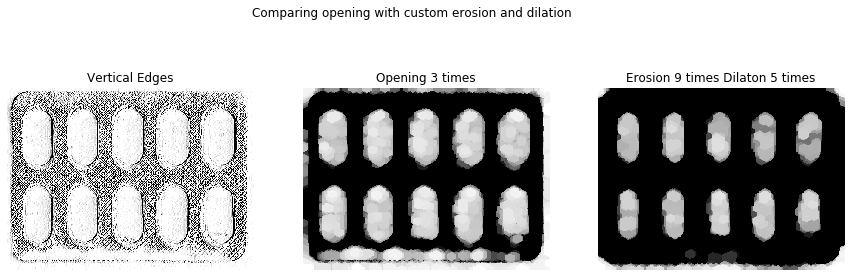

In [22]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))

opening = cv2.morphologyEx(vertical_inv, cv2.MORPH_OPEN, kernel, iterations = 5)

erosion = cv2.erode(vertical_inv, kernel, iterations = 9)
dilate = cv2.dilate(erosion, kernel, iterations = 5)

utils.showImage([vertical_inv, opening, dilate], ['Vertical Edges', 'Opening 3 times', 'Erosion 9 times Dilaton 5 times'], 
                'Comparing opening with custom erosion and dilation')